# Neuronale Netze: digits datset

Dieses Jupyter Notebook führt die Ergebnisse des dritten Projektes im Modul Special Engineering (M30) zum Thema Neuronale Netze auf. Als Datenset wird das digits Datenset verwendet.

In [1]:
###############################################################################
# Digits Dataset: Neuronales Netz
# Sidney Göhler 544131
#### IKT (M)
# Special Engineering SoSe20
# Prof. Dr. Andreas Zeiser
###############################################################################
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

from sklearn.datasets import load_digits

from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score

import time
import pandas as pd
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import activations

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #, TensorBoard

##########################
#import helperfunctions
from helper import plotactivationfunctions

%load_ext autoreload
%autoreload 2


Die Vorhersagekraft des Neuronalen Netzes kann unter anderem von der verwendeten Bibliothek abhängig sein.

In [2]:
tf.keras.__version__

'2.3.0-tf'

# Datenset

Es wird das selbe Datenset wie bei der Logistischen Regression verwendet, wodurch sich diese beiden Ansätze miteinander vergleichen lassen.
Es handelt sich weiterhin um das digits Datenset welches 1797 8x8 Bilder mit handgeschriebenen Ziffern enthällt.

In [3]:
####################
# load datasets
####################
dataset = load_digits()
print(dataset.DESCR, '\n', '\n')
X = dataset.data
y = dataset.target

targets = dataset.target_names
images = dataset.images



.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Visualisieren von einzelnen Ziffern
Nachdem das Datenset geladen wurde, können vereinzelte Zahlen illustriert werden.

digit = 0 at index = 0


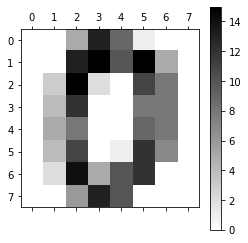

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]



digit = 0 at index = 20


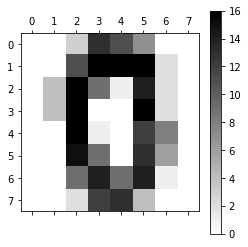

[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]



digit = 8 at index = 500


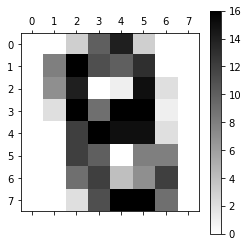

[[ 0.  0.  3. 10. 14.  3.  0.  0.]
 [ 0.  8. 16. 11. 10. 13.  0.  0.]
 [ 0.  7. 14.  0.  1. 15.  2.  0.]
 [ 0.  2. 16.  9. 16. 16.  1.  0.]
 [ 0.  0. 12. 16. 15. 15.  2.  0.]
 [ 0.  0. 12. 10.  0.  8.  8.  0.]
 [ 0.  0.  9. 12.  4.  7. 12.  0.]
 [ 0.  0.  2. 11. 16. 16.  9.  0.]]



digit = 8 at index = 508


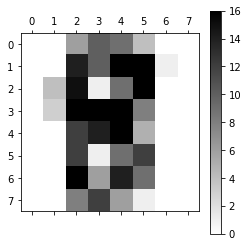

[[ 0.  0.  6. 10.  9.  4.  0.  0.]
 [ 0.  0. 14. 10. 16. 16.  1.  0.]
 [ 0.  4. 15.  1.  9. 16.  0.  0.]
 [ 0.  3. 16. 16. 16.  8.  0.  0.]
 [ 0.  0. 12. 14. 16.  5.  0.  0.]
 [ 0.  0. 12.  1.  9. 12.  0.  0.]
 [ 0.  0. 16.  6. 14.  9.  0.  0.]
 [ 0.  0.  8. 12.  6.  1.  0.  0.]]



digit = 5 at index = 1700


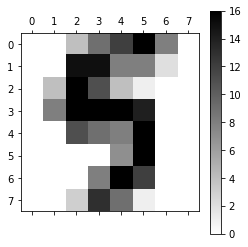

[[ 0.  0.  4.  9. 12. 16.  8.  0.]
 [ 0.  0. 15. 15.  8.  8.  2.  0.]
 [ 0.  4. 16. 11.  4.  1.  0.  0.]
 [ 0.  8. 16. 16. 16. 14.  0.  0.]
 [ 0.  0. 11.  9.  8. 16.  0.  0.]
 [ 0.  0.  0.  0.  7. 16.  0.  0.]
 [ 0.  0.  0.  8. 16. 12.  0.  0.]
 [ 0.  0.  3. 13.  9.  1.  0.  0.]]



digit = 5 at index = 1787


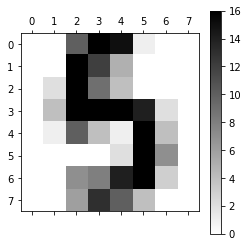

[[ 0.  0. 10. 16. 15.  1.  0.  0.]
 [ 0.  0. 16. 12.  5.  0.  0.  0.]
 [ 0.  2. 16.  9.  4.  0.  0.  0.]
 [ 0.  4. 16. 16. 16. 14.  2.  0.]
 [ 0.  1. 10.  4.  1. 16.  4.  0.]
 [ 0.  0.  0.  0.  2. 16.  7.  0.]
 [ 0.  0.  7.  8. 14. 16.  3.  0.]
 [ 0.  0.  6. 13. 10.  4.  0.  0.]]





In [4]:
for ind in [0,20,500,508,1700,1787]:
    print(f'digit = {y[ind]} at index = {ind}')
    plt.matshow(images[ind], cmap = cm.gray_r)
    plt.colorbar()
    plt.show()
    print(f'{images[ind]}\n\n\n')

Zu sehen ist, dass die selben Ziffern häufig minimale bis deutliche Unterschiede untereinander haben. Die Zeilen 3 und 4 wirken stark frequentiert, hingegen die Spalten 0 und 7 sehr schwach.

Anzumerken ist noch, dass die Features des Datensets, aufgrund der Tatsache, dass es sich ausschlißelich um Helligkeitswerte handelt, bereits skaliert sind.
Ein erneutes skalieren ist somit nicht unbedingt Notwendig aber dennoch ratsam, da das Gradientenabstiegsverfahren wohl deutlich schneller Konvergiert.
https://en.wikipedia.org/wiki/Feature_scaling#cite_note-1

# Feature Vorverarbeitung

Bei den Fetures handelt es ausschließlich um numerische Features welche von 0 bis 16 skaliert sind. Es bietet sich an, den Werteberech aufgrund der Tatsache, dass Gradientbasierte Optimierungsverfahren etwas schneller konvergieren können, wenn die Features auf den Wertebereich [0;1] skaliert sind.

In [5]:
#scale to 0...1
X = X/16

Anschließend wird das Datenset in Trainingsdate, Testdaten und Validierungsdaten aufgeteilt.

In [6]:
####################
# split dataset (60:20:20)
####################


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=4202)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=4202)

print('trainset ',np.shape(X_train),np.shape(y_train),
      '\ntestset ', np.shape(X_test),np.shape(y_test),
      '\nvalidationset ',np.shape(X_val),np.shape(y_val))

trainset  (1078, 64) (1078,) 
testset  (359, 64) (359,) 
validationset  (360, 64) (360,)


# Hyperparameter des neuronalen Netzes

Das Neuronale Netz wird per Backprobation Verfahren trainiert, was bedeutet, dass auf Basis der Differenz zwischen Output und Input mithilfe eines Algorithmus versucht wird, diese Differenz (Kosten) zu minimieren. Bekannt ist bereits das Gradientenabstiegsverfahren, es haben sich aber über die Jahre weitere, oft effizientere Verfahren, herauskristalisiert (z.B. Adam https://arxiv.org/abs/1412.6980).
Diese Optimierungsalgorithmen ermitteln möglicherweise Iterativ minima in der Kostenfunktion. Die Schrittweite ist die Lernrate, welche es zu optimieren gilt.

Als weiterer Hyperparameter gilt es die Anzahl der versteckten Schichten, sowie die Anzahl der Neuronen Je versteckter Schciht zu ermitteln. Eine zu geringe Komplexität kann zur Unteranpassung, wohingegen eine zu hohe Flexibilität (zu hohe Anzahl an Parametern) zur Überanpassung des Modelles führen kann.
Hier gilt es mit verschiedenen Regularisierungstechniken gegenzusteuern, wofür unter anderem der Hyperparameter `dropout` bestimmt werden muss, welcher angiebt mit welcher Wahrscheinlichkeit ein Neuron temporär ignoriert wird.
Da wir zum gleichen Zweck in unserem Neuronalen Netz Batch Normalzation verwenden möchten, welche den Input jedes Neurons Mittelwertfrei und auf ein Intervall normalisiert, muss auch der Parameter `momentum` bestimmt werden.

Ein weiterer wichtiger Hyperparameter ist die Aktivierungsfunktion jedes einzelnen Neurons, welche die Neuronenausgabe nicht-linear anpasst. Es haben sich über die Zeit immer neue Aktivierungsfunktionen herauskristialsiert, welche jeweils Ihre Vor- und Nachteile haben.
State of the art sind (R)eLU und seine Varianten.

C:\Users\sigoehler\Documents\Uni\Uni\python\ann\helper.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem([0],[0.1], '-.')


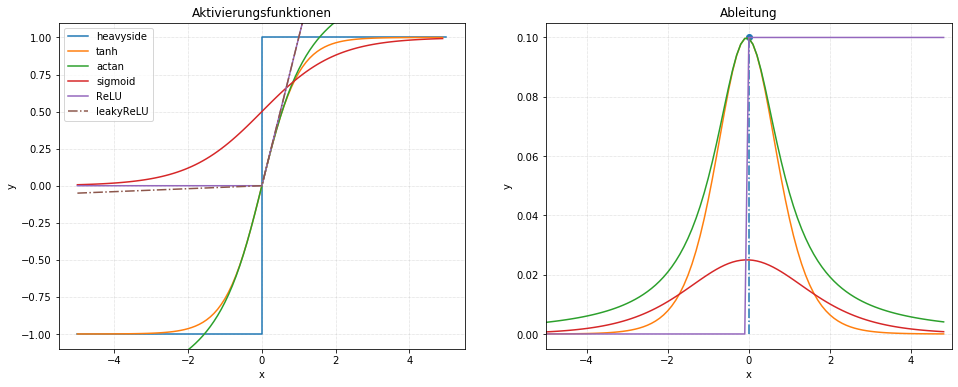

In [7]:
#plot activation functions
plotactivationfunctions()


Lineare Aktivierungsfunktionen unterliegen einer starken Beschränkung, da eine Komposition linearer Funktionen durch arithmetische Umformungen durch eine einzige lineare Funktion dargestellt werden kann. Für mehrschichtige Verbindungsnetzwerke sind sie deswegen nicht geeignet und finden so nur in einfachen Modellen Anwendung. 

Die `Batchsize` gibt an mit wie vielen Trainingsinstanzen der Optimierungsalgorithmus pro Iteration rechnen soll. Hohe Batchsizes haben den Vorteil, dass der berechnete Gradient genauer ist, bürgen aber die Gefahr, dass der Algorithmus in einem lokalen Minima oder auf einem Plateau stecken bleibt.
Aufgrund einer kleinen Batchsize benötigt der Algorithmus mehr Iterationsschritte und findet möglicherweise deutlich langsamer die richtige Abstiegsrichtung. Aufgrund dessen hat der Algorithmus unter Umständen aber so die Möglichkeit aus lokalen Minima zu entkommen und weiter zu optimieren. 

Zusammengefasst werden folgende Hyperparameter untersucht:
- dropout #https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
- Patience
- Lernrate
- momentum
- Anzahl der Hidden Layer
- Anzahl der Neuronen je Hidden Layer
- die Größe eines Batches #https://datascience.stackexchange.com/questions/12532/does-batch-size-in-keras-have-any-effects-in-results-quality

# Definition des Neuronalen Netzes

Anschließend wird eine Funktion definiert, welche auf Basis verschiedener Hyperparameter ein Keras Sequential Model sowie weitere Unterstützer zurückgiebt.

In [8]:
#https://keras.io/api/layers/regularizers/
#https://keras.io/api/layers/normalization_layers/batch_normalization/
#https://keras.io/api/layers/regularization_layers/dropout/
#https://keras.io/api/layers/regularization_layers/activity_regularization/
#https://keras.io/api/layers/core_layers/activation/
#https://keras.io/api/losses/


loss_fn = keras.losses.SparseCategoricalCrossentropy()

def create_model(n_hidden_layer=1, n_neurons_per_layer=32, learning_rate=5e-4, momentum=0.9, dropout=0.2, batch_size = 4, patience = 10, optimizer="SGD", txt = ""):
    model = Sequential()
    
    model_path = f"modelle\!digit_classifier_{time.time()}_{txt}.h5"
    
    #nb_batch_size = round(len(X_train) / nb_batches)
    
    #inputlayer
    model.add(layers.Dense(64, activation='relu', input_shape=(64,)))
    
    #hiddenlayer
    for lay in range(n_hidden_layer):
        model.add(layers.BatchNormalization(momentum=momentum))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(n_neurons_per_layer, activation='relu', activity_regularizer=regularizers.l2(learning_rate)))
    
    #outpulayer
    model.add(layers.BatchNormalization(momentum=momentum))
    model.add(layers.Dense(10, activation='softmax'))
    
    
    
    model.compile(loss=loss_fn,
             optimizer=optimizer,
             metrics=["accuracy"])

    
    checkpointer = ModelCheckpoint(filepath=model_path,
                               verbose=0,
                               save_best_only=True)

    early_stopping = EarlyStopping(patience=patience,
                               verbose=0,
                               restore_best_weights=True)
    
    return model, checkpointer, early_stopping

nb_epoch = 1000

Zum Einen ist hier Anzumerken, dass die Anzahl der Neuronen in der Eingangsschicht (64) und Ausgangsschicht (10) fix sind, da jede Ziffer aus 64 Pixeln besteht und 10 verschiedene Klassen ermitteln werden sollen. Man hätte evtl auch ein Neuronales Netz mit einem Ausgangsneuron erzeugen können und ggf. den Wert der Ziffer mittels Regression ermitteln können.
Die Anzahl der Neuronen in den versteckten Schichten ist variabel und muss ermittelt werden.
Zum Anderen wird bis auf in der Ausgangsschicht, jeweils die ReLU Aktivierungsfunktion verwendet.

Jede versteckte Schicht beginnt mit einer Batchnormalization Schicht, gefolgt von einer Dropoutschicht, wonach die eigentliche versteckte Schicht kommt. Anzumerken ist hier, dass bei jeder versteckten Schicht ein `activity regulizer` nach der l2 Norm die Kostenfunktion "teurer" macht, um einer Überanpassung vorzubeugen.
Ziel es ist, große Gewichte zu eliminieren und dadurch die Zerklüftung der Fehleroberfläche zu minimieren. Dadurch können Fehler, die bei der Initialisierung der Startgewichte gemacht wurden, wieder ausgeglichen werden.

Als Optimierungsverfahren wird das stochastische Gradientenabstiegsverfahren angewendet, welches im Vergleich zum normalen GD den Gradienten über den Mittelwert einzelner zufällig gewählter Gradienten ermittelt.

Das Neuronale Netz wird maximal in 1000 Epochen trainiert, wobei zu hoffen ist, dass deutlich früher ein Minima gefunden werden kann und somit die Trainingsphase frühzeitig beendet werden kann.

Als Kostenfunktion wurde der `crossentropy loss` gewählt, welcher den kosten zwischen den 10 Vorhersagungen je Ausgangsneuron und den Labels berechnet, wodurch das Neuronale Netz per Backprobabation angepasst wird.

# Ermitteln der optimalen Hyperparameter mittels GridSearch

Mithilfe eines Parameter Grids werden verschiedene Hyperparameterkombinationen mithilfe des GridSearch Algorithmus geprüft, wobei als Gütekennzahl der F1-Score verwendet wird.

In [ ]:
#https://neuroforge.de/wie-optimiere-ich-ein-neuronales-netz/
model_sk = KerasClassifier(build_fn=create_model)

scorer = make_scorer(f1_score, average='weighted')


param_grid = {

    'n_hidden_layer': [3, 4, 5, 6],
    'n_neurons_per_layer': [180, 200, 220, 240, 260],
    'learning_rate': [5e-4, 5e-3, 5e-2, 5e-1],
    'momentum': [0.999, 0.99],
    'dropout' : [0.1, 0.2, 0.3],
    'patience' : [10, 30, 50, 70]
}

grid = GridSearchCV(estimator = model_sk,
                    param_grid=param_grid,
                    scoring=scorer,
                    verbose=2,
                    #n_jobs=-1,
                    cv=3)

grid_result = grid.fit(X_train, y_train, epochs=nb_epoch,
                    shuffle=True,
                    validation_data=(X_val, y_val),
                    verbose=0,
                    callbacks=[checkpointer, early_stopping])


Nach dem sehr langwierigen Gridsearch Verfahren (>2d) kann die Parameterkonfiguration mit dem höchsten score ermittelt werden. Um die Rechenzeiten zuknftig zu reduzieren bietet es sich ggf. an entweder nicht so viele Hyperparameterkombinationen gleichzeitig zu testen, oder auf andere Verfahren, wie z.B. das Randomizedsearch Verfahren zurückzugreifen.

Da der Gridsearch Algorithmus auf einem anderen Rechner lief hab ich die Hyperparameter hier manuell eingetragen.

In [9]:
# best params estimated with GS
bestparams = {
    "dropout" : 0.2,
    "learning_rate": 0.0005,
    "momentum": 0.99,
    "n_hidden_layer": 3,
    "n_neurons_per_layer": 200, 
    "batch_size" : 9,
    "patience" : 30
}


Anzumerken ist hier noch, dass besonders die Lernrate als auch die Batchsize, also mit wie vielen Trainingsinstanzen der Gradient bestimmt werden soll, einen starken Einfluss auf die Modellqualität haben.
Im Großen und Ganzen ergiebt sich die Vorhersagekraft aber aus der Kombination aller Hyperparameter.

Der Hyperparameter patience besagt nach wie vielen Epochen ohne weiteren Fortschritt abgebrochen werden soll, wobei hier die Gefahr besteht, dass der Algorithmus zu früh abbricht, da der Grdientabstieg zwar ~0 ist aber noch kein Minima gefunden wurde (Er befindet sich auf einem Plateau).

Anschließend kann ein Neuronales Netz auf Basis der ermittelten Parameter erzeugt werden.

In [10]:
bestmodel, checkpointer, early_stopping = create_model(**bestparams)
bestmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               13000     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               4

Aufgrund der hohen Anzahl an Parametern muss nachfolgend geprüft werden wie stark sich das Modell an die Trainingsdaten angepasst hat. Bei den nicht Trainierbaren Parametern handel es sich um die Parameter der Batchnormalization Schichten.

# Training mit dem gesamten Trainingsdatenset

Nachfolgend werden die Parameter des Neuronale Netz mit dem gesammten Trainingsdatenset berechnet. Die Metriken über alle Epochen werden in einer Variable gespeichert.

In [11]:
time_start = time.time()

history = bestmodel.fit(X_train, y_train, epochs=nb_epoch,
                    shuffle=True,
                    batch_size=bestparams['batch_size'],
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[checkpointer, early_stopping])

print(f'took {time.time()-time_start} seconds..\n')


Epoch 1/1000
120/120 [==============================] - 1s 8ms/step - loss: 1.5794 - accuracy: 0.5306 - val_loss: 1.6801 - val_accuracy: 0.5222
Epoch 2/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.8821 - accuracy: 0.7801 - val_loss: 0.6133 - val_accuracy: 0.9028
Epoch 3/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.7430 - accuracy: 0.8089 - val_loss: 0.3679 - val_accuracy: 0.9139
Epoch 4/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.7270 - accuracy: 0.8200 - val_loss: 0.3490 - val_accuracy: 0.9389
Epoch 5/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.6637 - accuracy: 0.8349 - val_loss: 0.3301 - val_accuracy: 0.9361
Epoch 6/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.6485 - accuracy: 0.8386 - val_loss: 0.3219 - val_accuracy: 0.9500
Epoch 7/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.6313 - accuracy: 0.8469 - val_loss: 0.3484 - val_accuracy:

120/120 [==============================] - 1s 6ms/step - loss: 0.2698 - accuracy: 0.9629 - val_loss: 0.1803 - val_accuracy: 0.9861
Epoch 58/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2845 - accuracy: 0.9545 - val_loss: 0.1828 - val_accuracy: 0.9861
Epoch 59/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3281 - accuracy: 0.9406 - val_loss: 0.1916 - val_accuracy: 0.9750
Epoch 60/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.9573 - val_loss: 0.1849 - val_accuracy: 0.9889
Epoch 61/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.9369 - val_loss: 0.1877 - val_accuracy: 0.9722
Epoch 62/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.9490 - val_loss: 0.2111 - val_accuracy: 0.9750
Epoch 63/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2929 - accuracy: 0.9499 - val_loss: 0.1817 - val_accuracy: 0.9861

120/120 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9583 - val_loss: 0.1617 - val_accuracy: 0.9833
Epoch 114/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2269 - accuracy: 0.9657 - val_loss: 0.1545 - val_accuracy: 0.9778
Epoch 115/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2563 - accuracy: 0.9610 - val_loss: 0.1565 - val_accuracy: 0.9806
Epoch 116/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2423 - accuracy: 0.9638 - val_loss: 0.1579 - val_accuracy: 0.9750
Epoch 117/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.9434 - val_loss: 0.1565 - val_accuracy: 0.9806
Epoch 118/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2472 - accuracy: 0.9629 - val_loss: 0.1598 - val_accuracy: 0.9750
Epoch 119/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2396 - accuracy: 0.9564 - val_loss: 0.1585 - val_accuracy: 

Das Neuronale Netz wurde in 120 Minibatches je Epoche trainiert und bricht das Training wegen `early stopping` nach 162 Epochen ab, da scheinbar das beste Modell bereits in den letzten 40 Epochen gefunden wurde.
Anschließend werden der `loss` und `accuracy` der Trainingsdaten und Validierungsdaten je Epoche angegeben.

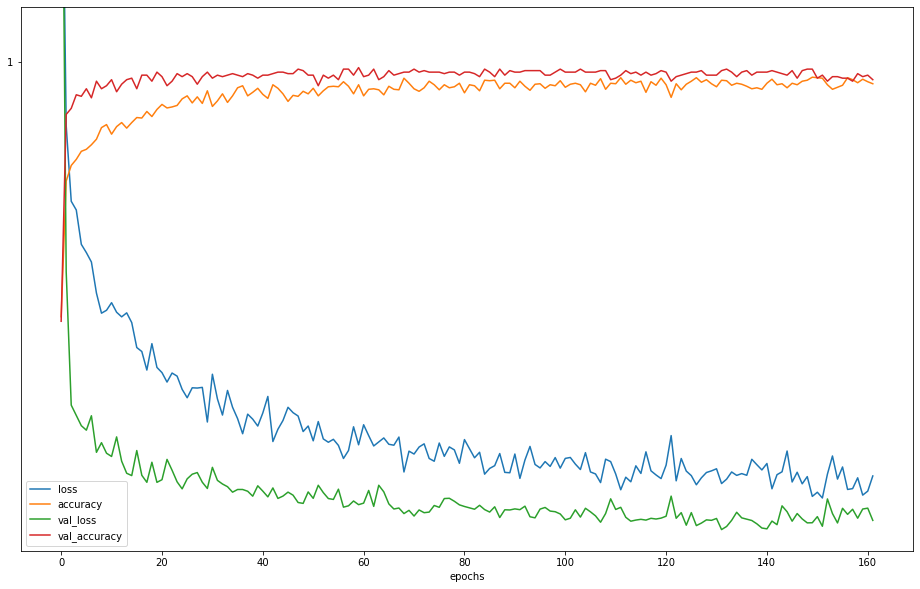

min val loss: 0.13901540637016296


In [12]:
ticks = np.arange(0.0,80.0,1)

fig = plt.figure(figsize=(16,10))
df = pd.DataFrame(history.history)

plt.yticks(ticks)
plt.ylim(0.1,1.1)
plt.xlabel('epochs')
plt.plot(df)
plt.legend(df.columns)
plt.show()

print('min val loss:',min(history.history['val_loss']))

Zu sehen sind der `loss` und der `accuracy` Wert der Trainingsdaten und Validierungsdaten je Epoche. Erkennbar ist, dass sich das Modell zu keinem Zeitpunkt perfekt an die Trainingsdatensätze anpasst da der `accuracy` Wert der Trainingsdaten zu keinem Punkt `0.9323` überschreitet. Der maximale `accuracy` Wert auf den Validierungsdate liegt bei `0.9861`.

Bermerkenswert is jedoch, dass die Kennzahlen für die Validierungsdaten ziemlich früh die der Traingsdaten überholen, im Großen und Ganzen aber nah beieinander sind, was für ein gut angepasstes Modell spricht. #https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

Nach ca. 30 Epochen ist aber erkenntbar, das sich die Kennzahlen stabilisieren und somit das Training frühzeitig beendet werden kann.

# Vorhersagungen auf den Testdatensätzen und Metriken

Nachfolgen werden die Testdatensätze mithilfe des resultierenden Neuronalen Netzes verhergesagt. Anzumerken ist, dass das Neuronal Netz bei seinen Vorhersagungen aufgrund der Netzstruktur für jede trainierte Ziffer eine Wahrscheinlichkeit berechnet, sodass die Vorhergesagt Ziffer die Ziffer mit der höchsten Wahrscheinlichkeit entspricht.

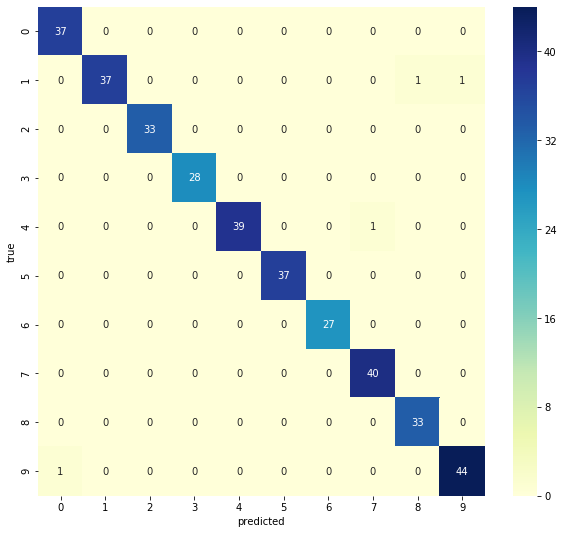

In [13]:
predictions = bestmodel.predict(X_test)

y_pred = np.zeros(np.shape(y_test))

for ind, pred in enumerate(predictions):
    y_pred[ind] = np.argmax(pred)
    
cnf_matrix = confusion_matrix(y_test,y_pred)

fig = plt.figure(figsize=(10,9))
sns.heatmap(cnf_matrix, cmap='YlGnBu', annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [14]:
print(classification_report(y_test, y_pred, output_dict=False))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.95      0.97        39
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        28
           4       1.00      0.97      0.99        40
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        27
           7       0.98      1.00      0.99        40
           8       0.97      1.00      0.99        33
           9       0.98      0.98      0.98        45

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359



Nachfolgend werden zum vergleich nocheinmal die mittels Logistischer Regression ermittelten Metriken aufgeführt.

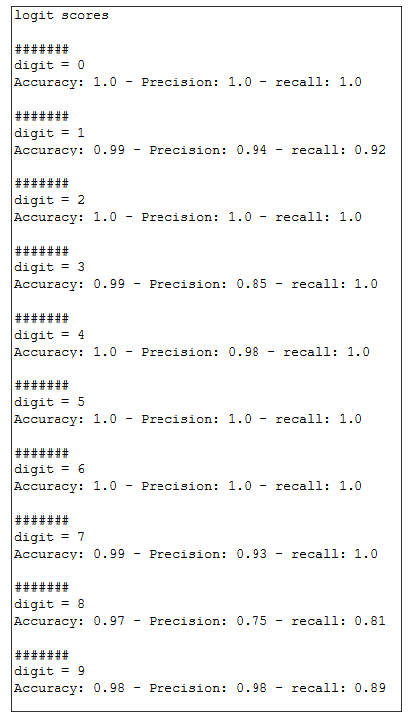

In [15]:
fig = plt.figure(figsize=(7,14))
img=mpimg.imread('logitscores.png')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

Zu sehen ist, dass das Neuronale Netz dem Logistischen Klassifizierer bei allen digits gleichwertig oder sogar überlegen ist. Besonders ist dies bei der Fall bei der 3 und der 8. Nur bei der 0 hat das Neuronale Netz im precision einen niedrigeren Wert.


Zu erwähnen ist aber auch, dass das trainieren des Neuronalen Netzes aufgrund der hohen Anzahl der Parameter deutlich länger dauert obwohl die Anzahl der Iterationen aufgrund der early stopping Algorithmen geringer ist.

* **Logistische Regression**: `~65s` für `74.067` Iterationen

* **Neuronale Netz**: `~90s` für `19.440‬` Iterationen


# Visualisieren der falsch Klassifizierten Zahlen
Das resutierende Neuronale Netz hat im Grunde ca. 99% der Ziffern richtig klassifiziert.
Nachfolgend werden die falsch Klassifizierten Zahlen mit der berechneten Wahrscheinlichkeit und die eigentliche Klasse illustriert.

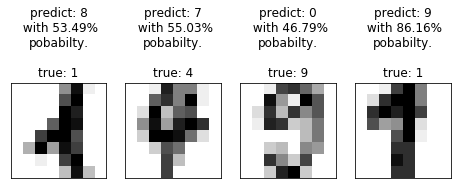

In [16]:
# Plot
f = plt.figure(figsize=(12, 12))
ind  =0
mask = y_test != y_pred

for i, d in enumerate(X_test):
    if mask[i]:
        #print(i, y_test[i],y_pred[i])
        img = d.reshape(8,8)
        sub = f.add_subplot(3, 6, ind+1)
        sub.imshow(img, cmap=cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        sub.set_title(f'predict: {int(y_pred[i])}\n with {np.max(predictions[i]*100):.4}%\npobabilty.\n\ntrue: {y_test[i]}')
        ind=ind+1

Auffällig ist, dass das resultierende Neuronal Netz aktuell anscheinend manchmal "Probleme" hat die Ziffer 1 zu erkennen.

# Lernkurve

Abschließend werden n Neuronale Netze mit steigender Anzahl an Traininsdaten trainiert und validiert.

In [17]:
loss_test = []
loss_train= []
loss_val  = []
time_start2 = time.time()

over = [1 ,2 ,3 , 4, 6, 8, 10, 14, 18, 22, 26, 30, 36, 42, 52, 62, 72, 82, 92, 102, 112, 122, 142, 162, 182, 202,
        222, 242, 264, 284, 308, 328, 348, 368, 388, 400, 410, 420, 430, 444, 468, 490, 520, 550, 580, 610, 640, 670,
        700, 730, 760, 790, 810, 820, 830, 850, 880, 930, 960, 990, 1000, 1010, 1020, 1032, 1054, 1078]

print(f'learning curve for {len(over)} iterations... ')

for ind, d in enumerate(over):
    time_start = time.time()

    X_train_lc = X_train[:d]
    y_train_lc = y_train[:d]

    
    lcmodel, checkpointer, early_stopping = create_model(**bestparams)

    
    lchistory = lcmodel.fit(X_train_lc, y_train_lc, epochs=nb_epoch,
                    shuffle=True,
                    batch_size=bestparams['batch_size'],
                    validation_data=(X_val, y_val),
                    verbose=0,
                    callbacks=[checkpointer, early_stopping])
    
    

    predictions = lcmodel.predict(X_test)

    
    loss_test.append(loss_fn(y_test, predictions))
    loss_train.append(np.min(lchistory.history['loss']))
    loss_val.append(np.min(lchistory.history['val_loss']))

   #print(f'took {time.time()-time_start} seconds..\n')
    print(f'{ind+1}: Calculating for {d} samples done... took {time.time()-time_start:.5}s')
    
print(f'Done... took {time.time()-time_start2:.8}s')

learning curve for 66 iterations... 
1: Calculating for 1 samples done... took 5.9458s
2: Calculating for 2 samples done... took 10.623s
3: Calculating for 3 samples done... took 12.325s
4: Calculating for 4 samples done... took 6.714s
5: Calculating for 6 samples done... took 24.199s
6: Calculating for 8 samples done... took 10.473s
7: Calculating for 10 samples done... took 17.315s
8: Calculating for 14 samples done... took 20.759s
9: Calculating for 18 samples done... took 26.912s
10: Calculating for 22 samples done... took 13.913s
11: Calculating for 26 samples done... took 21.569s
12: Calculating for 30 samples done... took 11.914s
13: Calculating for 36 samples done... took 16.844s
14: Calculating for 42 samples done... took 13.418s
15: Calculating for 52 samples done... took 17.138s
16: Calculating for 62 samples done... took 15.248s
17: Calculating for 72 samples done... took 14.155s
18: Calculating for 82 samples done... took 12.286s
19: Calculating for 92 samples done... took

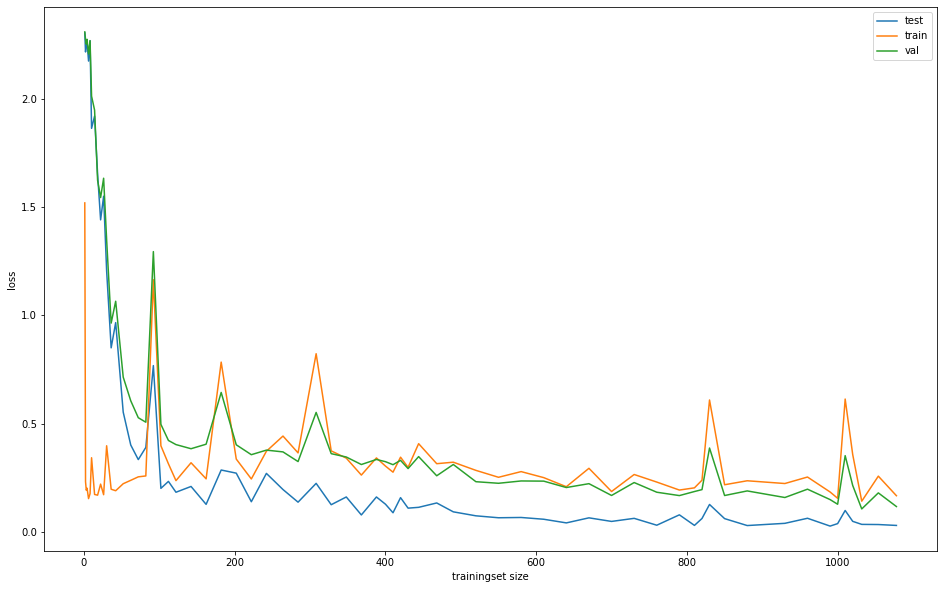

In [19]:
fig = plt.figure(figsize=(16,10))

#plt.ylim(0,1.1)
plt.xlabel('trainingset size')
plt.ylabel('loss')
plt.plot(over, loss_test, label='test')
plt.plot(over, loss_train, label='train')
plt.plot(over, loss_val, label='val')
plt.legend()
plt.show()


Der Kosten der Trainingsdaten ist zunächst deutlich geringer als der Kostern der Test- und Validierungsdaten. Ab einer Trainsdatensetgröße von ca. wechselt sich dies ab, der Kosten gegen die Trainingsdaten ist aufgrund der Regularisierung zu keinem Zeitpunkt 0.
Das aus den gewählten Hyperparameters resultierende Neuronale Netz scheint die Bilddaten gut zu abstrahieren und scheint weder Unter- noch Überangepasst.

# Ausblick

Dieses Neuronale Netz scheint mit seiner `~0.99` accuracy auf den Validierungsdaten bereits am oberen Limit zu sein, vermutlich wird man durch andere Hyperparameter kaum bessere Ergebnisse erziehlen können.
Gerade bei der Bilderkennung haben sich aber sg. convolutional neural networks (CNN) horvorgehoben, welche eine etwas andere Netzstruktur vorweisen, da sie vor dem eigentlich Neuronalen Netz noch ein oder mehrere convolutional Layer haben welche ganze Matrizen als Eingabe haben. 
#https://www.kaggle.com/amiiiney/digit-recognizer-using-cnn-99-accuracy
#https://www.kaggle.com/c/digit-recognizer/discussion/61480
#https://de.wikipedia.org/wiki/Convolutional_Neural_Network